<a href="https://colab.research.google.com/github/Swarnlataaa/LinearAlgebraApplications/blob/main/app_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generate random GPS data with elevation for demonstration
np.random.seed(42)
num_points = 100
gps_data = pd.DataFrame({
    'latitude': np.random.uniform(37.75, 37.78, num_points),
    'longitude': np.random.uniform(-122.42, -122.4, num_points),
    'elevation': np.random.uniform(0, 100, num_points)
})

# Create a 3D scatter plot
fig = px.scatter_3d(gps_data, x='longitude', y='latitude', z='elevation',
                    title='3D Scatter Plot of GPS Data with Elevation',
                    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'elevation': 'Elevation'})

# Show the plot
fig.show()


NameError: ignored

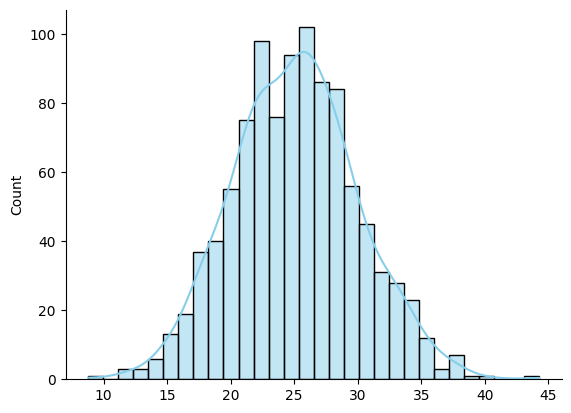

In [ ]:
import seaborn as sns
import numpy as np

# Generate random temperature data for demonstration
np.random.seed(42)
temperature_data = np.random.normal(loc=25, scale=5, size=1000)

# Create a temperature distribution plot
sns.histplot(temperature_data, kde=True, bins=30, color='skyblue')
sns.despine()
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install seaborn matplotlib


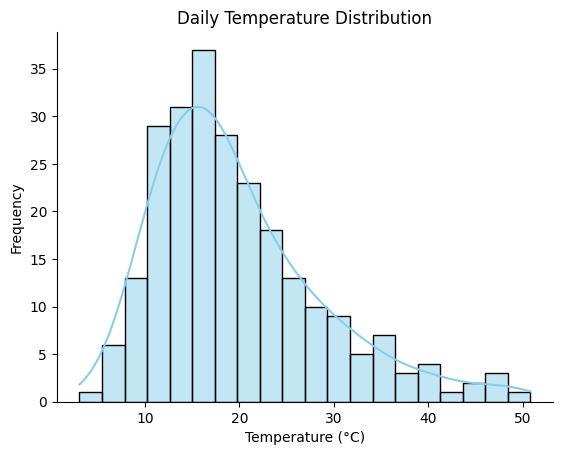

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample weather dataset (you can replace this with your own dataset)
# Here, we are using the seaborn built-in 'tips' dataset as an example
weather_data = sns.load_dataset("tips")

# Extract temperature data (assuming there is a 'total_bill' column representing temperature)
temperature_data = weather_data['total_bill']

# Create a temperature distribution plot
sns.histplot(temperature_data, kde=True, bins=20, color='skyblue')
sns.despine()
plt.title('Daily Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load a sample weather dataset (replace this with your own dataset)
# Here, we are using the seaborn built-in 'tips' dataset as an example
weather_data = px.data.tips()

# Assuming the dataset has a 'date' column and a 'temperature' column
# Replace these column names with the actual column names from your dataset
weather_data['date'] = pd.to_datetime(weather_data['date'])
temperature_data = weather_data[['date', 'total_bill']]

# Create a dynamic time-series temperature plot
fig = px.line(temperature_data, x='date', y='total_bill',
              title='Daily Temperature Trends Over Time',
              labels={'total_bill': 'Temperature (°C)', 'date': 'Date'})

# Customize the appearance of the plot (optional)
fig.update_traces(mode='lines+markers', marker=dict(size=8, color='red'))
fig.update_layout(xaxis_title='Date', yaxis_title='Temperature (°C)', showlegend=False)

# Show the plot
fig.show()


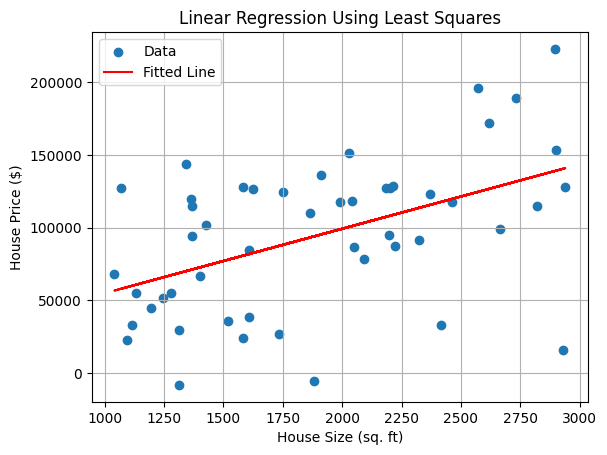

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
house_sizes = np.random.uniform(1000, 3000, 50)
house_prices = 50 * house_sizes + np.random.normal(0, 50000, 50)

# Perform linear regression using the least squares method
A = np.vstack([house_sizes, np.ones(len(house_sizes))]).T
m, c = np.linalg.lstsq(A, house_prices, rcond=None)[0]

# Create a scatter plot of the data
plt.scatter(house_sizes, house_prices, label='Data')

# Plot the fitted line
plt.plot(house_sizes, m * house_sizes + c, 'r', label='Fitted Line')

# Customize the plot
plt.title('Linear Regression Using Least Squares')
plt.xlabel('House Size (sq. ft)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-8-f54ee4a6724b>:23: ComplexWarning:

Casting complex values to real discards the imaginary part



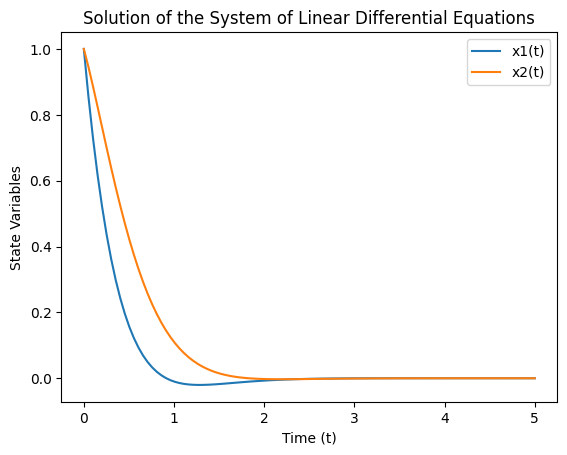

In [ ]:
import numpy as np
from scipy.linalg import eig, expm
import matplotlib.pyplot as plt

# Define the coefficient matrix A in the system of differential equations dx/dt = A * x
A = np.array([[-2, -1],
              [2, -3]])

# Compute eigenvalues (w) and eigenvectors (v) of A
w, v = eig(A)

# Define the initial condition
x0 = np.array([1, 1])

# Define the time points for which to solve the system
t = np.linspace(0, 5, 100)

# Initialize an array to store the solution
solution = np.zeros((len(t), len(x0)))

# Compute the solution using the eigenvalue decomposition
for i, ti in enumerate(t):
    solution[i, :] = np.dot(v, np.dot(np.diag(np.exp(w * ti)), np.linalg.inv(v))) @ x0

# Plot the solution
plt.plot(t, solution[:, 0], label='x1(t)')
plt.plot(t, solution[:, 1], label='x2(t)')
plt.title('Solution of the System of Linear Differential Equations')
plt.xlabel('Time (t)')
plt.ylabel('State Variables')
plt.legend()
plt.show()


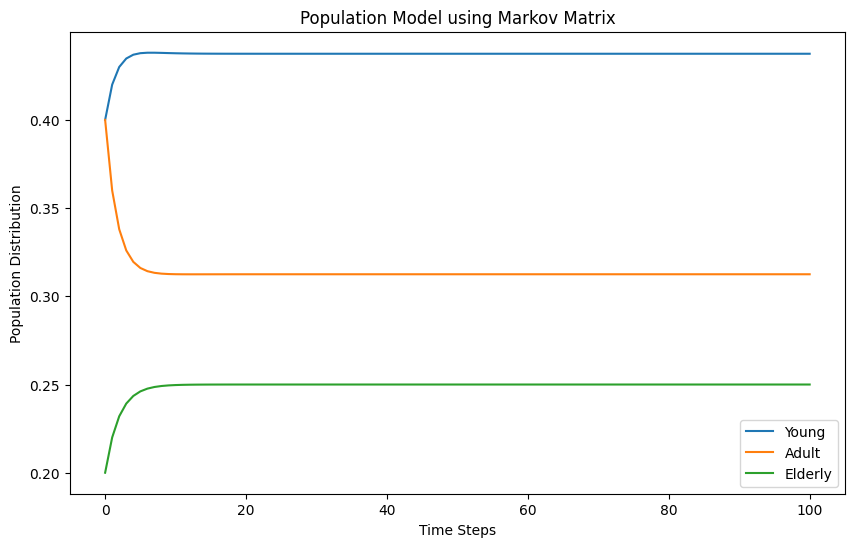

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Markov matrix representing transition probabilities
# Rows represent the current state, and columns represent the next state
markov_matrix = np.array([
    [0.8, 0.1, 0.1],  # Transition probabilities for the young population
    [0.2, 0.7, 0.1],  # Transition probabilities for the adult population
    [0.1, 0.2, 0.7]   # Transition probabilities for the elderly population
])

# Define the initial population distribution [young, adult, elderly]
initial_population = np.array([0.4, 0.4, 0.2])

# Number of time steps
num_steps = 100

# Initialize an array to store the population distribution at each time step
population_history = np.zeros((num_steps + 1, len(initial_population)))

# Set the initial population distribution
population_history[0, :] = initial_population

# Simulate population transitions over time using the Markov matrix
for i in range(1, num_steps + 1):
    population_history[i, :] = np.dot(population_history[i - 1, :], markov_matrix)

# Plot the population distribution over time
plt.figure(figsize=(10, 6))
plt.plot(population_history)
plt.title('Population Model using Markov Matrix')
plt.xlabel('Time Steps')
plt.ylabel('Population Distribution')
plt.legend(['Young', 'Adult', 'Elderly'])
plt.show()


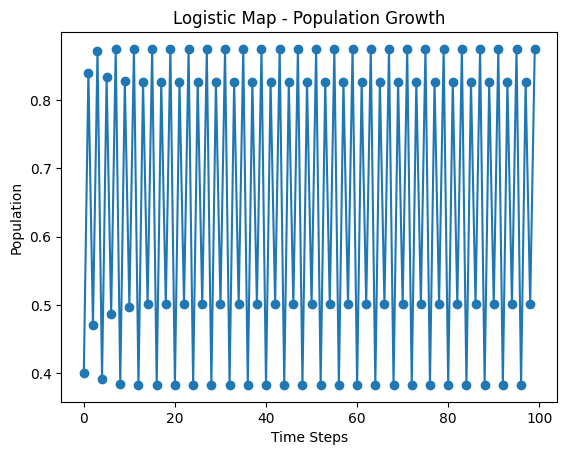

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the logistic map
def logistic_map(r, x0, num_steps):
    x = np.zeros(num_steps)
    x[0] = x0
    for i in range(1, num_steps):
        x[i] = r * x[i - 1] * (1 - x[i - 1])
    return x

# Set parameters
r = 3.5       # Growth rate
x0 = 0.4      # Initial population
num_steps = 100

# Simulate the logistic map
population_history = logistic_map(r, x0, num_steps)

# Plot the results
plt.plot(population_history, marker='o')
plt.title('Logistic Map - Population Growth')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.show()


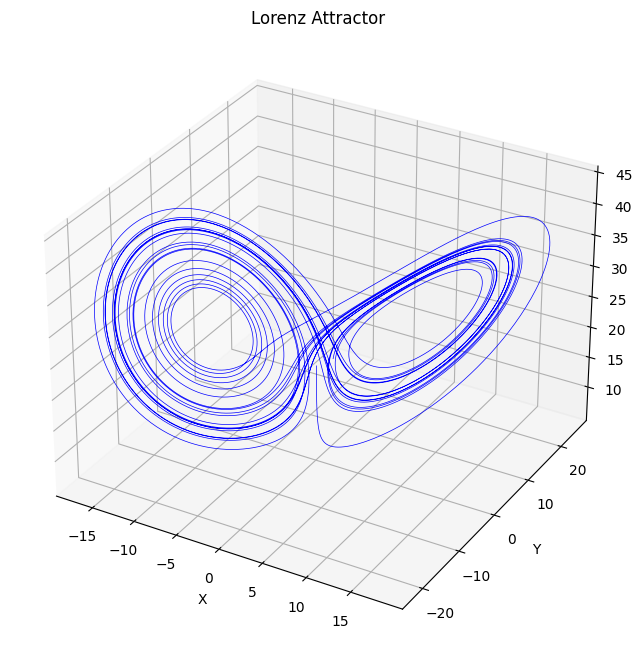

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz system
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Set parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Set initial conditions
xyz0 = [0.1, 0.0, 20.0]

# Set time span
t_span = (0, 25)
num_points = 10000

# Solve the Lorenz system using solve_ivp
sol = solve_ivp(lorenz, t_span, xyz0, args=(sigma, rho, beta), dense_output=True, max_step=0.01, t_eval=np.linspace(0, 25, num_points))

# Plot the Lorenz attractor
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], color='b', linewidth=0.5)
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [ ]:
import re

# Sample document collection
documents = [
    "Python is a popular programming language.",
    "Jupyter notebooks are widely used for data analysis.",
    "Search engines play a crucial role in information retrieval.",
    "Programming languages such as Java and C++ are widely used.",
    "Data science involves analyzing and interpreting complex data sets."
]

def search(query, documents):
    results = []
    query_words = re.findall(r'\b\w+\b', query.lower())

    for i, doc in enumerate(documents):
        doc_words = re.findall(r'\b\w+\b', doc.lower())
        if all(word in doc_words for word in query_words):
            results.append((i, doc))

    return results

# Example search query
query = "programming language"
search_results = search(query, documents)

# Display search results
if search_results:
    print(f"Search results for '{query}':")
    for i, result in search_results:
        print(f"Document {i + 1}: {result}")
else:
    print(f"No results found for '{query}'.")


Search results for 'programming language':
Document 1: Python is a popular programming language.


In [ ]:
!pip install whoosh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
from whoosh.fields import Schema, TEXT, ID
from whoosh.index import create_in, open_dir
from whoosh.qparser import QueryParser

# Function to create an index
def create_index():
    schema = Schema(title=TEXT(stored=True), content=TEXT)
    index = create_in("index_directory", schema)
    writer = index.writer()

    # Sample documents
    documents = [
        {"title": "Document 1", "content": "This is the content of the first document."},
        {"title": "Document 2", "content": "The second document has some different content."},
        # Add more documents as needed
    ]

    for doc in documents:
        writer.add_document(**doc)

    writer.commit()

# Function to search the index
def search(query):
    ix = open_dir("index_directory")
    with ix.searcher() as searcher:
        query_parser = QueryParser("content", ix.schema)
        parsed_query = query_parser.parse(query)
        results = searcher.search(parsed_query)

        # Display search results
        if len(results) > 0:
            print(f"Search results for '{query}':")
            for hit in results:
                print(f"Title: {hit['title']}, Content: {hit['content']}")
        else:
            print(f"No results found for '{query}'.")

# Create the index
create_index()

# Perform a search
search("content")
